<IPython.core.display.Javascript object>


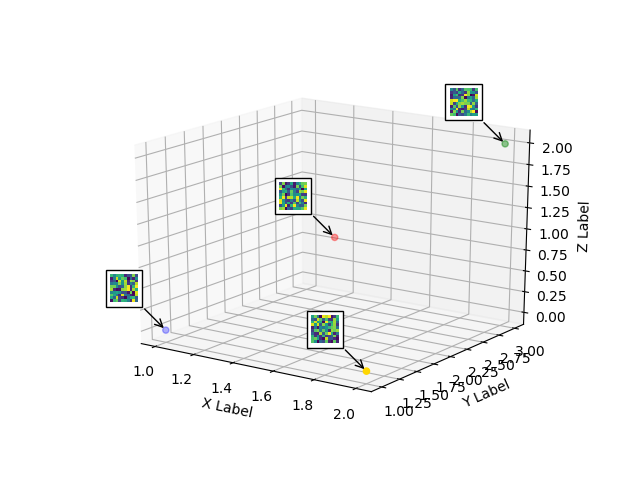

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import numpy as np
%matplotlib notebook 
xs = [1,1.5,2,2]
ys = [1,2,3,1]
zs = [0,1,2,0]
c = ["b","r","g","gold"]


fig = plt.figure()
ax = fig.add_subplot(111, projection=Axes3D.name)

ax.scatter(xs, ys, zs, c=c, marker="o")

# Create a dummy axes to place annotations to
ax2 = fig.add_subplot(111,frame_on=False) 
ax2.axis("off")
ax2.axis([0,1,0,1])

class ImageAnnotations3D():
    def __init__(self, xyz, imgs, ax3d,ax2d):
        self.xyz = xyz
        self.imgs = imgs
        self.ax3d = ax3d
        self.ax2d = ax2d
        self.annot = []
        for s,im in zip(self.xyz, self.imgs):
            x,y = self.proj(s)
            self.annot.append(self.image(im,[x,y]))
        self.lim = self.ax3d.get_w_lims()
        self.rot = self.ax3d.get_proj()
        self.cid = self.ax3d.figure.canvas.mpl_connect("draw_event",self.update)

        self.funcmap = {"button_press_event" : self.ax3d._button_press,
                        "motion_notify_event" : self.ax3d._on_move,
                        "button_release_event" : self.ax3d._button_release}

        self.cfs = [self.ax3d.figure.canvas.mpl_connect(kind, self.cb) \
                        for kind in self.funcmap.keys()]

    def cb(self, event):
        event.inaxes = self.ax3d
        self.funcmap[event.name](event)

    def proj(self, X):
        """ From a 3D point in axes ax1, 
            calculate position in 2D in ax2 """
        x,y,z = X
        x2, y2, _ = proj3d.proj_transform(x,y,z, self.ax3d.get_proj())
        tr = self.ax3d.transData.transform((x2, y2))
        return self.ax2d.transData.inverted().transform(tr)

    def image(self,arr,xy):
        """ Place an image (arr) as annotation at position xy """
        im = offsetbox.OffsetImage(arr, zoom=2)
        im.image.axes = ax
        ab = offsetbox.AnnotationBbox(im, xy, xybox=(-30., 30.),
                            xycoords='data', boxcoords="offset points",
                            pad=0.3, arrowprops=dict(arrowstyle="->"))
        self.ax2d.add_artist(ab)
        return ab

    def update(self,event):
        if np.any(self.ax3d.get_w_lims() != self.lim) or \
                        np.any(self.ax3d.get_proj() != self.rot):
            self.lim = self.ax3d.get_w_lims()
            self.rot = self.ax3d.get_proj()
            for s,ab in zip(self.xyz, self.annot):
                ab.xy = self.proj(s)


imgs = [np.random.rand(10,10) for i in range(len(xs))]
ia = ImageAnnotations3D(np.c_[xs,ys,zs],imgs,ax, ax2 )

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()